In [2]:
!sudo apt-get install libportaudio2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 64.6 kB of archives.
After this operation, 215 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Fetched 64.6 kB in 0s (221 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 155455 files

In [3]:
!pip install sounddevice

In [12]:
!pip install crypto

In [16]:
pip install pycrypto

     |████████████████████████████████| 446 kB 5.2 MB/s 
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp37-cp37m-linux_x86_64.whl size=499932 sha256=7516358757c6e7fc3c7b1d432de66df3c0282a87ecccb2edb16f16dce9d71369
  Stored in directory: /root/.cache/pip/wheels/cf/85/ba/bbd7c96add459de7598fb424e5ff2309baf2095c844ac0f191
Successfully built pycrypto


In [17]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import random
import string
from Crypto.Cipher import AES

Text(0.5, 1.0, 'Original Audio Plot')

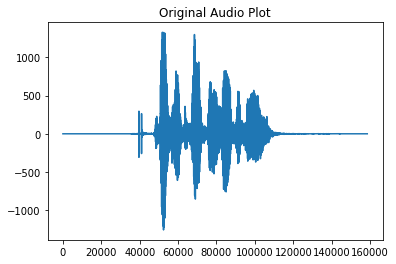

In [18]:
fs, data = wavfile.read('/content/drive/MyDrive/03-01-01-01-01-01-01.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")

In [19]:
with open('/content/drive/MyDrive/03-01-01-01-01-01-01.wav', 'rb') as fd:
    contents = fd.read()

In [21]:
AES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(32))

AES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(16))

In [22]:
print("AES Key is ", AES_KEY)
print("AES Initialization vector is ", AES_IV)

AES Key is  PZGw7LIhHzsFl2mui8EWGuXDAUWwYhon
AES Initialization vector is  U4wFAoFjDfXIGkRi


In [24]:
encryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
encrypted_audio = encryptor.encrypt(contents)

In [25]:
with open('/content/drive/MyDrive/encrypted_audio_file.wav', 'wb') as fd:
    fd.write(encrypted_audio)
print("A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated")

A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated


In [27]:
with open('/content/drive/MyDrive/encrypted_audio_file.wav', 'rb') as fd:
    contents = fd.read()

In [28]:
decryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
decrypted_audio = decryptor.decrypt(contents)

In [29]:
with open('/content/drive/MyDrive/decrypted_audio_file.wav', 'wb') as fd:
    fd.write(decrypted_audio)

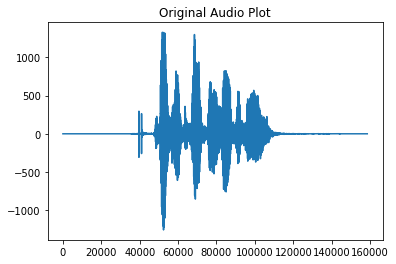

In [30]:
fs, data = wavfile.read('/content/drive/MyDrive/decrypted_audio_file.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)